# Fitting Function Models
A functional model allows for the creation of data, fitting of experimental data, plotting and symbolic manipulation of mathematical models based on functions. This includes symbolic intergration, differentiation and algebra. This module requires sympy and numpy to work. 

In [411]:
from pyMeasure.Code.Analysis.Fitting import *
import matplotlib.pyplot as plt
import random
from ipywidgets import *

## Creation of a new functional model
1. Pass parameters as a list or a string separated by spaces
2. Pass variables as a list or a string seperated by spaces
3. Pass an equation that sympy understands 

In [90]:
line=FunctionalModel(parameters=["m","b"],variables="x",equation="m*x+b")

In [91]:
# now line can be point on any line
line(m=1.2,b=3,x=.1)

3.12

In [92]:
# or you can set the parameters
line.set_parameters(m=3,b=1)
# now any x_list you pass it as an np.array can be calculated
line(np.array([-1,0,1]))

array([-2,  1,  4])

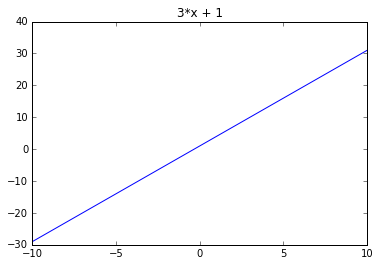

In [93]:
%matplotlib inline
# This can be used to plot functions
x_data=np.linspace(-10,10,1000)
plt.plot(x_data,line(x_data))
plt.title(str(line))
plt.show()

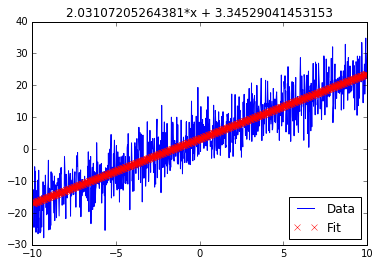

In [94]:
# if you have a data set it can actually fit the data using the model
x_data=np.linspace(-10,10,1000)
# make a line with a little noise
y_data=np.array([2*x + 3.5 +random.gauss(0,5) for x in x_data])
# now to fit we use line.fit_data
line.fit_data(x_data,y_data)
plt.plot(x_data,y_data,label="Data")
plt.plot(x_data,line(x_data),"rx",label="Fit")
plt.title(str(line))
plt.legend(loc=4)
plt.show()

In [95]:
# this works with even more complicated functions
gaussian=FunctionalModel(parameters="alpha x0 delta",variables="x",equation="alpha*exp(-1*(x-x0)^2/(2*delta**2))")

In [96]:
print(gaussian)

alpha*exp(-(x - x0)**2/(2*delta**2))


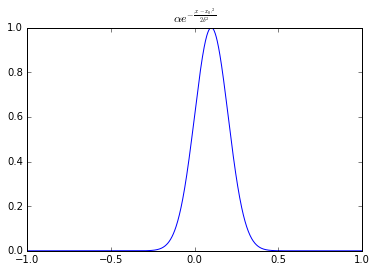

In [97]:
# it also has a latex form
x_data=np.linspace(-1,1,1000)
plt.plot(x_data,gaussian(alpha=1,x0=.1,delta=.1,x=x_data))
plt.title("${0}$".format(gaussian.to_latex()))

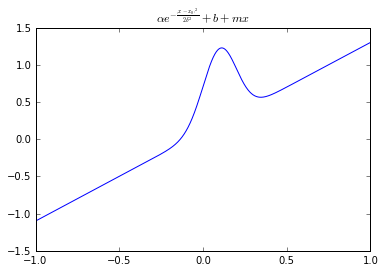

In [98]:
# Now you have the ability to add functions 
gauss_line=line+gaussian
x_data=np.linspace(-1,1,1000)
plt.plot(x_data,gauss_line(alpha=1,x0=.1,delta=.1,m=1.2,b=.1,x=x_data))
plt.title("${0}$".format(gauss_line.to_latek()))

In [99]:
# we can take a derivative
print(gauss_line.d())
# or a higher order one
print(gauss_line.d(order=4))
# or with respect to a parameter
print(gauss_line.d(respect_to="delta"))

-alpha*(2*x - 2*x0)*exp(-(x - x0)**2/(2*delta**2))/(2*delta**2) + m
3*alpha*exp(-(x - x0)**2/(2*delta**2))/delta**4 - alpha*(2*x - 2*x0)**2*exp(-(x - x0)**2/(2*delta**2))/delta**6 - alpha*(2*x - 2*x0)*(8*x - 8*x0)*exp(-(x - x0)**2/(2*delta**2))/(8*delta**6) + alpha*(2*x - 2*x0)**4*exp(-(x - x0)**2/(2*delta**2))/(16*delta**8)
alpha*(x - x0)**2*exp(-(x - x0)**2/(2*delta**2))/delta**3


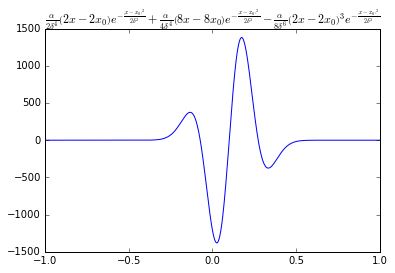

In [100]:
# we could even plot/fit using the derivative of any order
gauss_line=line+gaussian
x_data=np.linspace(-1,1,1000)
gauss_line_d3=gauss_line.d(order=3)
plt.plot(x_data,gauss_line_d3(alpha=1,x0=.1,delta=.1,m=1.2,b=.1,x=x_data))
plt.title("${0}$".format(gauss_line_d3.to_latex()))

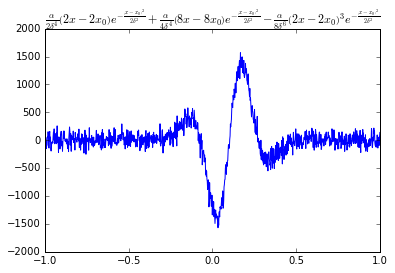

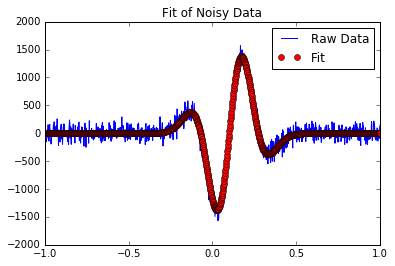

In [393]:
# or create data and fit it
gauss_line=line+gaussian
x_data=np.linspace(-1,1,1000)
output_noise=np.random.normal(0,100,len(x_data))
gauss_line_d3=gauss_line.d(order=3)
y_data=gauss_line_d3(alpha=1,x0=.1,delta=.1,m=1.2,b=.1,x=x_data)+output_noise
plt.plot(x_data,y_data)
plt.title("${0}$".format(gauss_line_d3.to_latex()))
fig=gauss_line_d3.plot_fit(x_data,
                           y_data,
                           **{"title":"Fit of Noisy Data","initial_guess":{"alpha":1,"x0":.1,"delta":.1,"m":1.2,"b":.1}})

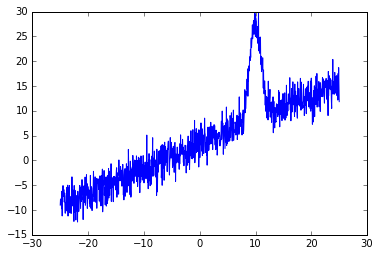

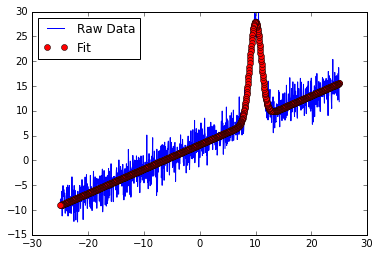

In [427]:
# now we can create a DataSimulator object to change the output noise on any FunctionalModel and fit it
model=line+gaussian
model_2=line+gaussian
model.set_parameters(m=.5,b=3.4,delta=1,x0=10.,alpha=20)
simulated_data=DataSimulator(model=model,output_noise_type="normal",output_noise_width=2.,output_noise_center=0.)
simulated_data.set_x(-25,25,1000)
plt.plot(simulated_data.x,simulated_data.data)
fig=model_2.plot_fit(simulated_data.x,simulated_data.data,**{"title":False,"initial_guess":model.parameter_values})

In [645]:
# now we can create an interactive plot
# By passing a keyword set of parameters we can change which parameters that we interact with
def plot_fit(**options):
    defaults= {"output_noise_type":"normal",
              "output_noise_width":2,
              "output_noise_center":0,
              "m":.5,
              "b":3.4,
              "delta":1,
              "x0":10,
              "alpha":20,
              "x_min":-25,
              "x_max":25,
              "number_points":1000}
    fit_options={}
    for key,value in defaults.iteritems():
        fit_options[key]=value
    for key,value in options.iteritems():
        fit_options[key]=value
    line=FunctionalModel(parameters=["m","b"],variables="x",equation="m*x+b")
    gaussian=FunctionalModel(parameters="alpha x0 delta",variables="x",equation="alpha*exp(-1*(x-x0)^2/(2*delta**2))")
    model=line+gaussian
    model_2=line+gaussian
    model.set_parameters(m=fit_options["m"],b=fit_options["b"],
                         delta=fit_options["delta"],x0=fit_options["x0"],alpha=fit_options["alpha"])
    simulated_data=DataSimulator(model=model,output_noise_type=fit_options["output_noise_type"],
                                 output_noise_width=fit_options["output_noise_width"],
                                 output_noise_center=fit_options["output_noise_center"])
    simulated_data.set_x(fit_options["x_min"],fit_options["x_max"],fit_options["number_points"])
    model_2.fit_data(simulated_data.x,simulated_data.data,**{"initial_guess":model.parameter_values})
    parameter_text="${0}$\n".format(sympy.latex(model_2.equation))
    for key,value in model_2.parameter_values.iteritems():
        parameter_text=parameter_text+"{0} = {1:3.2g} \n".format(key,value)
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3)
    ax0.plot(simulated_data.x,simulated_data.data,label="Data")
    ax0.plot(simulated_data.x,model_2(simulated_data.x),"ro",label="Fit")
    ax0.legend()
    ax1.text(fit_options["x_max"]+7,
             .1,
             parameter_text,
             fontsize=12)
    residuals=simulated_data.data-model_2(simulated_data.x)
    ax1.plot(simulated_data.x,residuals)
    ax2.hist(residuals)
    plt.show()

    

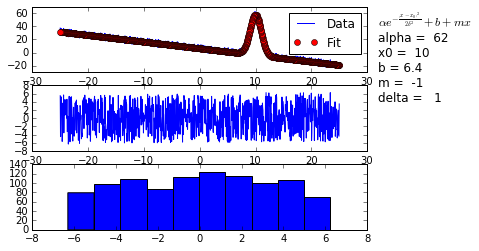

In [647]:
interact(plot_fit,
         x0=(-20,20,1),
         alpha=(-100,100,1),
         m=(-2,2,.1),
         output_noise_width=(0,10,1),output_noise_type=["normal","uniform","triangular"])

# Use case of electronic circuits
We can build electronic circuit models
<br/>
$Z_{L}=i 2 \pi f L $ <br/>
$Z_{C}=\frac{- i }{2 \pi f C} $ <br/>
$Z_R=R$

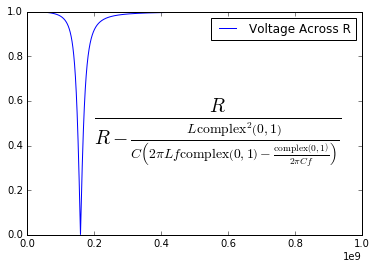

In [656]:
# We can use these models for simple electronic circuits
Zc=FunctionalModel(variables="f",parameters="C",equation="-1*complex(0,1)/(2*pi*f*C)")
Zl=FunctionalModel(variables="f",parameters="L",equation="complex(0,1)*(2*pi*f*L)")
Zr=FunctionalModel(variables="f",parameters="R",equation="R")
# now for frequencies
frequency=np.linspace(0.1*10**3,1*10**9,10000)

z_total=Zc**-1+Zl**-1+Zr**-1
# a RLC circuit
z_total=Zr+(Zc*Zl)/(Zc+Zl)
# voltage across the resistor
Vr=Zr/z_total

# plot of voltage across a resistor
Vr.set_parameters(C=10**(-10),L=10**-8,R=complex(50,0))
plt.plot(frequency,abs(Vr(frequency)),label="Voltage Across R")
plt.text(2*10**8,.5,"${0}$".format(sympy.latex(Vr.equation)),fontsize=28)
plt.legend()

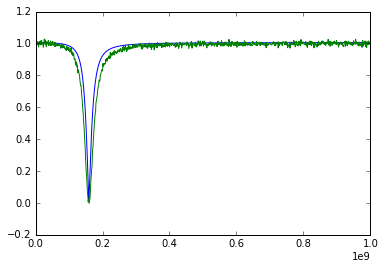

In [668]:
# again we could create a simulated data set with output noise
Vr_simulated_data=DataSimulator(model=Vr,output_noise_type="normal",output_noise_center=0,output_noise_width=.01)
plt.plot(frequency,abs(Vr_simulated_data(frequency)))
Vr_simulated_data.set_x(0,10**9,1000)
plt.plot(Vr_simulated_data.x,Vr_simulated_data.data)

# in addition this allows us to create 
Converting from Z-parameters to scattering parameters results in


$ S_{11}$ 	$ = \dfrac{\left(Z_{11} - Z_{1}\right)\cdot \left(Z_{22} + Z_{2}\ri... ...ft(Z_{11} + Z_{1}\right)\cdot \left(Z_{22} + Z_{2}\right) - Z_{12}\cdot Z_{21}}$ 	(15.54)

$ S_{12}$ 	$ = \sqrt{\dfrac{Z_2}{Z_1}}\cdot \dfrac{2\cdot Z_{12}\cdot Z_{1}}{\left(Z_{11} + Z_{1}\right)\cdot \left(Z_{22} + Z_{2}\right) - Z_{12}\cdot Z_{21}}$ 	(15.55)

$S_{21}$ 	$ = \sqrt{\dfrac{Z_1}{Z_2}}\cdot \dfrac{2\cdot Z_{21}\cdot Z_{2}}{\left(Z_{11} + Z_{1}\right)\cdot \left(Z_{22} + Z_{2}\right) - Z_{12}\cdot Z_{21}}$ 	(15.56)

$ S_{22}$ 	$ = \dfrac{\left(Z_{11} + Z_{1}\right)\cdot \left(Z_{22} - Z_{2}\ri... ...ft(Z_{11} + Z_{1}\right)\cdot \left(Z_{22} + Z_{2}\right) - Z_{12}\cdot Z_{21}}$ 	(15.57)


In [594]:
S11_1=FunctionalModel(variables="Z0",parameters="Z01 Z02",
                    equation="((Z0-conjugate(Z01))*(Z0+Z02)-Z0**2)/((Z0+Z01)*(Z0+Z02)-Z0**2)")
S11_data_1=DataSimulator(model=S11,output_noise_type="normal",output_noise_width=.01,output_noise_center=0)

In [595]:
S11=FunctionalModel(variables="Z0",parameters="Zr",equation="(Z0-Zr)/(Z0+Zr)")
S11_data=DataSimulator(model=S11,output_noise_type="normal",output_noise_width=.01,output_noise_center=0)

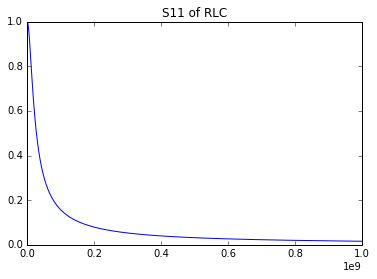

In [657]:
z_total.clear_parameters()
S11_RLC=S11.compose(z_total)
S11_RLC.set_parameters(L=10**-1,C=10**-10,R=50.1,Zr=complex(50,0))
plt.plot(frequency,abs(S11_RLC(frequency)))
plt.title("S11 of RLC")

In [648]:
S11_RLC.equation

(R - Zr - L*complex(0, 1)**2/(C*(2*pi*L*f*complex(0, 1) - complex(0, 1)/(2*pi*C*f))))/(R + Zr - L*complex(0, 1)**2/(C*(2*pi*L*f*complex(0, 1) - complex(0, 1)/(2*pi*C*f))))

(-0.333333333333+0j)


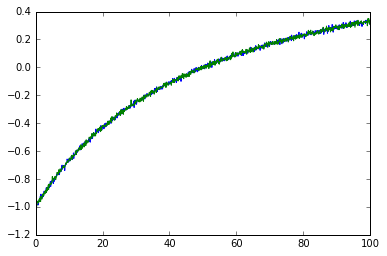

In [518]:
S11.set_parameters(Zr=complex(50,0))
S11_1.set_parameters(Z01=complex(50,0),Z02=complex(50,0))
print S11(Z0=complex(25,0))
S11_data.set_x(0,100,1000)
S11_data_1.set_x(0,100,1000)
plt.plot(S11_data.x,S11_data.data)
plt.plot(S11_data_1.x,S11_data_1.data)

In [592]:
class FunctionalModel(object):
    """FittingModel is a class that holds a fitting function, it uses sympy to provide
     symbolic manipulation of the function and formatted output. If called it acts like a
     traditional python function. Initialize the class with parameters, variables and an equation.
     Ex. line=FunctionalModel(variables='x', parameters='m b', equation='m*x+b'), to call as a function
     the parameters must be set. line(m=2,b=1,x=1) 
     or 
     line.set_parameters(m=1,b=2)
     line(1)"""
    def __init__(self,**options):
        defaults= {"parameters":None,"variables":None,"equation":None,"parameter_values":{}}
        self.options={}
        for key,value in defaults.iteritems():
            self.options[key]=value
        for key,value in options.iteritems():
            self.options[key]=value
        # fix any lists 
        for item in ["parameters","variables"]:
            if type(self.options[item]) is StringType:
                self.options[item]=re.split("\s+",self.options[item])
            self.__dict__[item]=self.options[item]
            self.__dict__[item+"_symbols"]=sympy.symbols(self.options[item])
            # this creates the python variables in the global namespace, may back fire with lots of variables
            for index,symbol in enumerate(self.__dict__[item+"_symbols"][:]):
                globals()[item[index]]=symbol
            self.options[item]=None
        self.equation=sympy.sympify(self.options["equation"])
        self.function=sympy.lambdify(self.parameters+self.variables,self.equation,'numpy')
        self.parameter_values=self.options["parameter_values"]
        self.options["parameter_values"]={}
        
    def __call__(self,*args,**keywordargs):
        """Controls the behavior when called as a function"""
        return self.function(*args,**keywordargs)
    
    def set_parameters(self,parameter_dictionary=None,**parameter_dictionary_keyword):
        """Sets the parameters to values in dictionary"""
        if parameter_dictionary is None:
            try:
                parameter_dictionary=parameter_dictionary_keyword
            except:
                pass
        self.parameter_values=parameter_dictionary
        self.function=sympy.lambdify(self.variables,self.equation.subs(self.parameter_values),'numpy')
        
            
    def clear_parameters(self):
        """Clears the parmeters specified by set_parameters"""
        self.function=sympy.lambdify(self.parameters+self.variables,self.equation,'numpy')
        self.parameter_values={}
        
    def fit_data(self,x_data,y_data,**options):
        """Uses the equation to fit the data, after fitting the data sets the parameters.
        """
        defaults= {"initial_guess":{parameter:0.0 for parameter in self.parameters},"fixed_parameters":None}
        self.fit_options={}
        for key,value in defaults.iteritems():
            self.fit_options[key]=value
        for key,value in options.iteritems():
            self.fit_options[key]=value
        
        def fit_f(a,x):
            self.clear_parameters()
            input_list=[]
            for parameter in a:
                input_list.append(parameter)
            input_list.append(x)
            return self.function(*input_list)
        # this needs to be reflected in fit_parameters
        a0=[]
        for key in self.parameters[:]:
            a0.append(self.fit_options["initial_guess"][key])
        a0=np.array(a0)
        result=least_squares_fit(fit_f,x_data,y_data,a0)
        fit_parameters=result.tolist()
        fit_parameter_dictionary={parameter:fit_parameters[index] for index,parameter in enumerate(self.parameters)}
        self.set_parameters(fit_parameter_dictionary)
        
    def __add__(self,other):
        """Defines addition for the class, if it is another functional model add the models else just change the 
        equation"""
        if type(other) in [FunctionalModel]:
            parameters=list(set(self.parameters+other.parameters))
            variables=list(set(self.variables+other.variables))
            #print("{0} is {1}".format("parameters",parameters))
            #print("{0} is {1}".format("variables",variables))
            equation=self.equation+other.equation
            #print("{0} is {1}".format("equation",equation))
        else:
            parameters=self.parameters
            variables=self.variables
            equation=self.equation+other
        new_function=FunctionalModel(parameters=parameters,variables=variables,equation=equation)
        return new_function
    def __sub__(self,other):
        """Defines subtraction for the class"""
        if type(other) in [FunctionalModel]:
            parameters=list(set(self.parameters+other.parameters))
            variables=list(set(self.variables+other.variables))
            #print("{0} is {1}".format("parameters",parameters))
            #print("{0} is {1}".format("variables",variables))
            equation=self.equation-other.equation
            #print("{0} is {1}".format("equation",equation))
        else:
            parameters=self.parameters
            variables=self.variables
            equation=self.equation-other
        new_function=FunctionalModel(parameters=parameters,variables=variables,equation=equation)
        return new_function
    def __mul__(self,other):
        """Defines multiplication for the class"""
        if type(other) in [FunctionalModel]:
            parameters=list(set(self.parameters+other.parameters))
            variables=list(set(self.variables+other.variables))
            #print("{0} is {1}".format("parameters",parameters))
            #print("{0} is {1}".format("variables",variables))
            equation=self.equation*other.equation
            #print("{0} is {1}".format("equation",equation))
        else:
            parameters=self.parameters
            variables=self.variables
            equation=self.equation*other
        new_function=FunctionalModel(parameters=parameters,variables=variables,equation=equation)
        return new_function
    
    def __pow__(self,other):
        """Defines power for the class"""
        if type(other) in [FunctionalModel]:
            parameters=list(set(self.parameters+other.parameters))
            variables=list(set(self.variables+other.variables))
            #print("{0} is {1}".format("parameters",parameters))
            #print("{0} is {1}".format("variables",variables))
            equation=self.equation**other.equation
            #print("{0} is {1}".format("equation",equation))
        else:
            parameters=self.parameters
            variables=self.variables
            equation=self.equation**other
        new_function=FunctionalModel(parameters=parameters,variables=variables,equation=equation)
        return new_function
    
    def __div__(self,other):
        """Defines division for the class"""
        if type(other) in [FunctionalModel]:
            parameters=list(set(self.parameters+other.parameters))
            variables=list(set(self.variables+other.variables))
            #print("{0} is {1}".format("parameters",parameters))
            #print("{0} is {1}".format("variables",variables))
            equation=self.equation/other.equation
            #print("{0} is {1}".format("equation",equation))
        else:
            parameters=self.parameters
            variables=self.variables
            equation=self.equation/other
        new_function=FunctionalModel(parameters=parameters,variables=variables,equation=equation)
        return new_function
    
    def __str__(self):
        """Controls the string behavior of the function"""
        return str(self.equation.subs(self.parameter_values))
    
    def compose(self,other):
        """Returns self.equation.sub(variable=other)"""
        if len(self.variables)==1:
            variables=other.variables
            parameters=list(set(self.parameters+other.parameters))
            equation=self.equation.subs({self.variables[0]:other})
            new_function=FunctionalModel(parameters=parameters,variables=variables,equation=equation)
            return new_function
        else:
            return None
        
    def to_latex(self):
        """Returns a Latek form of the equation using current parameters"""
        return sympy.latex(self.equation.subs(self.parameter_values))
    
    def plot_fit(self,x_data,y_data,**options):
        """Fit a data set and show the results"""
        defaults={"title":True}
        plot_options={}
        for key,value in defaults.iteritems():
            plot_options[key]=value
        for key,value in options.iteritems():
            plot_options[key]=value
            
        self.fit_data(x_data,y_data,**plot_options)
        figure=plt.figure("Fit")
        plt.plot(x_data,y_data,label="Raw Data")
        plt.plot(x_data,self.function(x_data),'ro',label="Fit")
        plt.legend(loc=0)
        if plot_options["title"]:
            if plot_options["title"] is True:
                plt.title(str(self))
            else:
                plt.title(plot_options["title"])
        plt.show()
        return figure
    
    def d(self,respect_to=None,order=1):
        """Takes the derivative with respect to variable or parameter provided or defaults to first variable"""
        if respect_to is None:
            respect_to=self.variables[0]
        equation=self.equation.copy()
        for i in range(order):
            equation=sympy.diff(equation,respect_to)
        return FunctionalModel(parameters=self.parameters[:],variables=self.variables[:],equation=str(equation))
    
    def integrate(self,respect_to=None,order=1):
        """Integrates with respect to variable or parameter provided or defaults to first variable.
        Does not add a constant of integration."""
        if respect_to is None:
            respect_to=self.variables_symbols[0]
        equation=self.equation.copy()
        for i in range(order):
            equation=sympy.integrate(equation,respect_to)
        return FunctionalModel(parameters=self.parameters[:],variables=self.variables[:],equation=str(equation))
    
class DataSimulator(object):
    """A class that simulates data. It creates a data set from a FunctionalModel with the parameters set,
    and an optional output noise. The attribute self.x has the x data and self.data has the result. The simulator may be
    called as a function on a single point or an numpy array."""
    def __init__(self,**options):
        """Intializes the DataSimulator class"""
        defaults= {"parameters":None,
                   "variables":None,
                   "equation":None,
                   "parameter_values":{},
                   "model":None,
                   "variable_min":None,
                   "variable_max":None,
                   "number_points":None,
                   "variable_step":None,
                   "output_noise_type":None,
                   "output_noise_width":None,
                   "output_noise_center":None,
                   "output_noise_amplitude":1.,
                   "random_seed":None,
                   "x":np.array([])}
        self.options={}
        for key,value in defaults.iteritems():
            self.options[key]=value
        for key,value in options.iteritems():
            self.options[key]=value
        # set the self.model attribute
        if self.options["model"]:
            self.model=self.options["model"]
        else:
            # try and create the model from the options
            try:
                self.model=FunctionalModel(variables=self.options["variables"],
                                           parameters=self.options["parameters"],
                                          equation=self.options["equation"])
            except:
                print("Could not form a model from the information given, either model has to be specified or"
                     "parameters, variables and equation has to be specified")
                # todo: make an error specific to this case
                raise
        if self.options["parameter_values"]:
            self.model.set_parameters(self.options["parameter_values"])
        self.x=self.options["x"]
        self.random_seed=self.options["random_seed"]
        output_noise_names=["type","center","width","amplitude"]  
        for index,output_noise_name in enumerate(output_noise_names):
            self.__dict__["output_noise_{0}".format(output_noise_name)]=self.options["output_noise_{0}".format(output_noise_name)]
        self.set_output_noise()
        if self.options["variable_min"] and self.options["variable_max"]:
            self.set_x(variable_min=self.options["variable_min"], 
                       variable_max=self.options["variable_max"],
                       number_points=self.options["number_points"],
                       variable_step=self.options["variable_step"])
        
          

        self.set_parameters=self.model.set_parameters
        self.clear_parameters=self.model.clear_parameters
        self.set_data()
        
    
        
    def set_x(self, variable_min=None, variable_max=None,number_points=None,variable_step=None):
        """Sets the dependent variable values, min, max and number of points or step"""
        if [variable_min,variable_max]==[None,None]:
            self.x=np.array([])
        else:
            if variable_step:
                number_points=(variable_max-variable_min)/variable_step
            self.x=np.linspace(variable_max,variable_min,number_points)
        self.set_output_noise()

            
    def set_output_noise(self,output_noise_type=None,output_noise_center=None,output_noise_width=None,output_noise_amplitude=1.):
        """Set the output noise distrubution. Possible types are gaussian, uniform, triangular, lognormal, with the 
        assumption all are symmetric
        """
        output_noise_characteristics=[output_noise_type,output_noise_center,output_noise_width,output_noise_amplitude]
        output_noise_names=["type","center","width","amplitude"]            
        for index,output_noise_characteristic in enumerate(output_noise_characteristics):
            if output_noise_characteristic:
                self.__dict__["output_noise_{0}".format(output_noise_names[index])]=output_noise_characteristic
        if self.output_noise_type is None or not self.x.any():
            self.output_noise=np.array([])
        else:
            # set the random seed
            np.random.seed(self.random_seed)
            
            # now handle the output types, all in np.random
            if re.search("gauss|normal",self.output_noise_type,re.IGNORECASE):
                self.output_noise=output_noise_amplitude*np.random.normal(self.output_noise_center,
                                                                    self.output_noise_width,len(self.x))
            elif re.search("uni|square|rect",self.output_noise_type,re.IGNORECASE):
                self.output_noise=output_noise_amplitude*np.random.uniform(self.output_noise_center-self.output_noise_width/2,
                                                                     self.output_noise_width+self.output_noise_width/2,
                                                                     len(self.x))
            elif re.search("tri",self.output_noise_type,re.IGNORECASE):
                self.output_noise=output_noise_amplitude*np.random.triangular(self.output_noise_center-self.output_noise_width/2,
                                                                     self.output_noise_center,
                                                                     self.output_noise_width+self.output_noise_width/2,
                                                                    len(self.x))
        self.set_data()
        

                
    def set_data(self):
        if self.model.parameter_values:
            if self.output_noise.any():
                out_data=self.model(self.x)+self.output_noise
            else:
                if self.x.any():
                    out_data=self.model(self.x)
                else:
                    out_data=[]
        else:
            out_data=[]
        self.data=out_data
    
    def get_data(self):
        return self.data[:]
    
    def __call__(self,x_data):
        """Returns the simulated data for x=x_data, to have deterministic responses, set self.random_seed"""
        if type(x_data) not in [np.array]:
            if type(x_data) is ListType:
                x_data=np.array(x_data)
            else:
                x_data=np.array([x_data])
        #print("{0} is {1}".format("x_data",x_data)) 
        self.x=x_data
        self.set_output_noise()
        self.set_data()
        out=self.data[:]
        if len(out)==1:
            out=out[0]
        return out


In [415]:
gauss_line_d3.set_parameters(alpha=1,x0=.1,delta=.1,m=3,b=.1)
new_data=DataSimulator(model=gauss_line_d3,output_noise_type="normal",output_noise_width=100.,output_noise_center=0.)

In [416]:
new_data.set_x(-2,1,variable_step=.01)

In [381]:
#new_data.set_data()
new_data.set_output_noise(output_noise_type="normal",output_noise_width=100)
#new_data.set_data()

In [348]:
len(new_data.x)

300

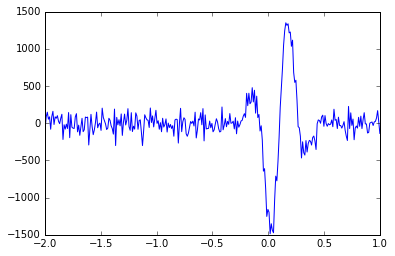

In [417]:
plt.plot(new_data.x,new_data.data)

In [389]:
new_data.random_seed=1
new_data(complex(-2,1))


(162.43453636632415+1.0888421531012056e-67j)

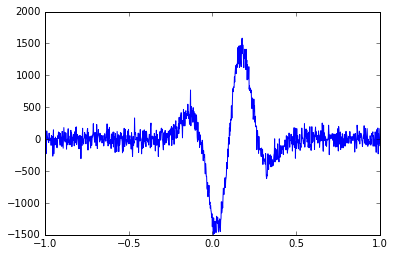

In [392]:
new_data.set_x(-1,1,1000)
new_data.set_output_noise(output_noise_width=100)
plt.plot(new_data.x,new_data.data)

In [229]:
new_data.model.parameter_values

{'alpha': 0.9998431390462384,
 'b': 0.1,
 'delta': 0.09999871568102596,
 'm': 1.2,
 'x0': 0.09999781924494598}

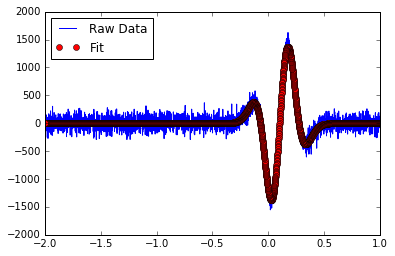

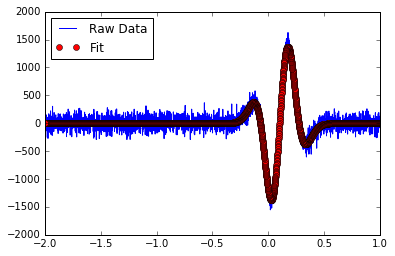

In [242]:
gauss_line_d3.plot_fit(new_data.x,new_data.data,**{"title":False,"initial_guess":{"alpha":1,"x0":.1,"delta":.1,"m":1.2,"b":.1}})

In [207]:
print gauss_line_d3

-125000.0*(2*x - 0.2)**3*exp(-50.0*(x - 0.1)**2) + 5000.0*(2*x - 0.2)*exp(-50.0*(x - 0.1)**2) + 2500.0*(8*x - 0.8)*exp(-50.0*(x - 0.1)**2)
